<a href="https://colab.research.google.com/github/DREAMZXS9/Inteligencia-Artificial-y-Redes-Neuronales-/blob/main/PIA/Modelo/PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
file_path = "seattle-weather.csv"
data = pd.read_csv(file_path)

In [ ]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
data["rain"] = data["weather"].apply(lambda x: 1 if x in ["rain", "drizzle"] else 0)

In [ ]:
data["temp_avg"] = (data["temp_max"] + data["temp_min"]) / 2

In [ ]:
data_model = data[["precipitation", "temp_avg", "rain"]]

In [ ]:
correlation = data_model.corr()
data_model.head(), correlation

(   precipitation  temp_avg  rain
 0            0.0      8.90     1
 1           10.9      6.70     1
 2            0.8      9.45     1
 3           20.3      8.90     1
 4            1.3      5.85     1,
                precipitation  temp_avg      rain
 precipitation       1.000000 -0.170465  0.431265
 temp_avg           -0.170465  1.000000 -0.275894
 rain                0.431265 -0.275894  1.000000)

In [ ]:
X = data_model[["precipitation", "temp_avg"]]
y = data_model["rain"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["No Lluvia", "Lluvia"])

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Lluvia", "Lluvia"]))

Accuracy: 0.9112627986348123
Classification Report:
               precision    recall  f1-score   support

   No Lluvia       0.89      0.96      0.92       164
      Lluvia       0.95      0.84      0.89       129

    accuracy                           0.91       293
   macro avg       0.92      0.90      0.91       293
weighted avg       0.91      0.91      0.91       293



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

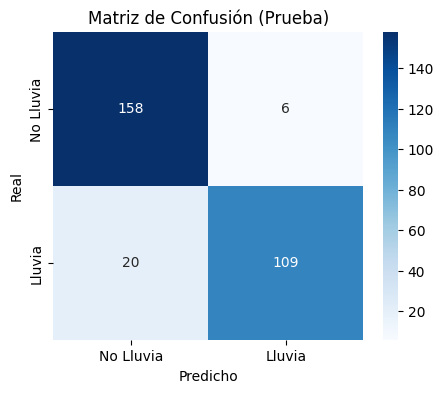

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Lluvia", "Lluvia"], yticklabels=["No Lluvia", "Lluvia"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

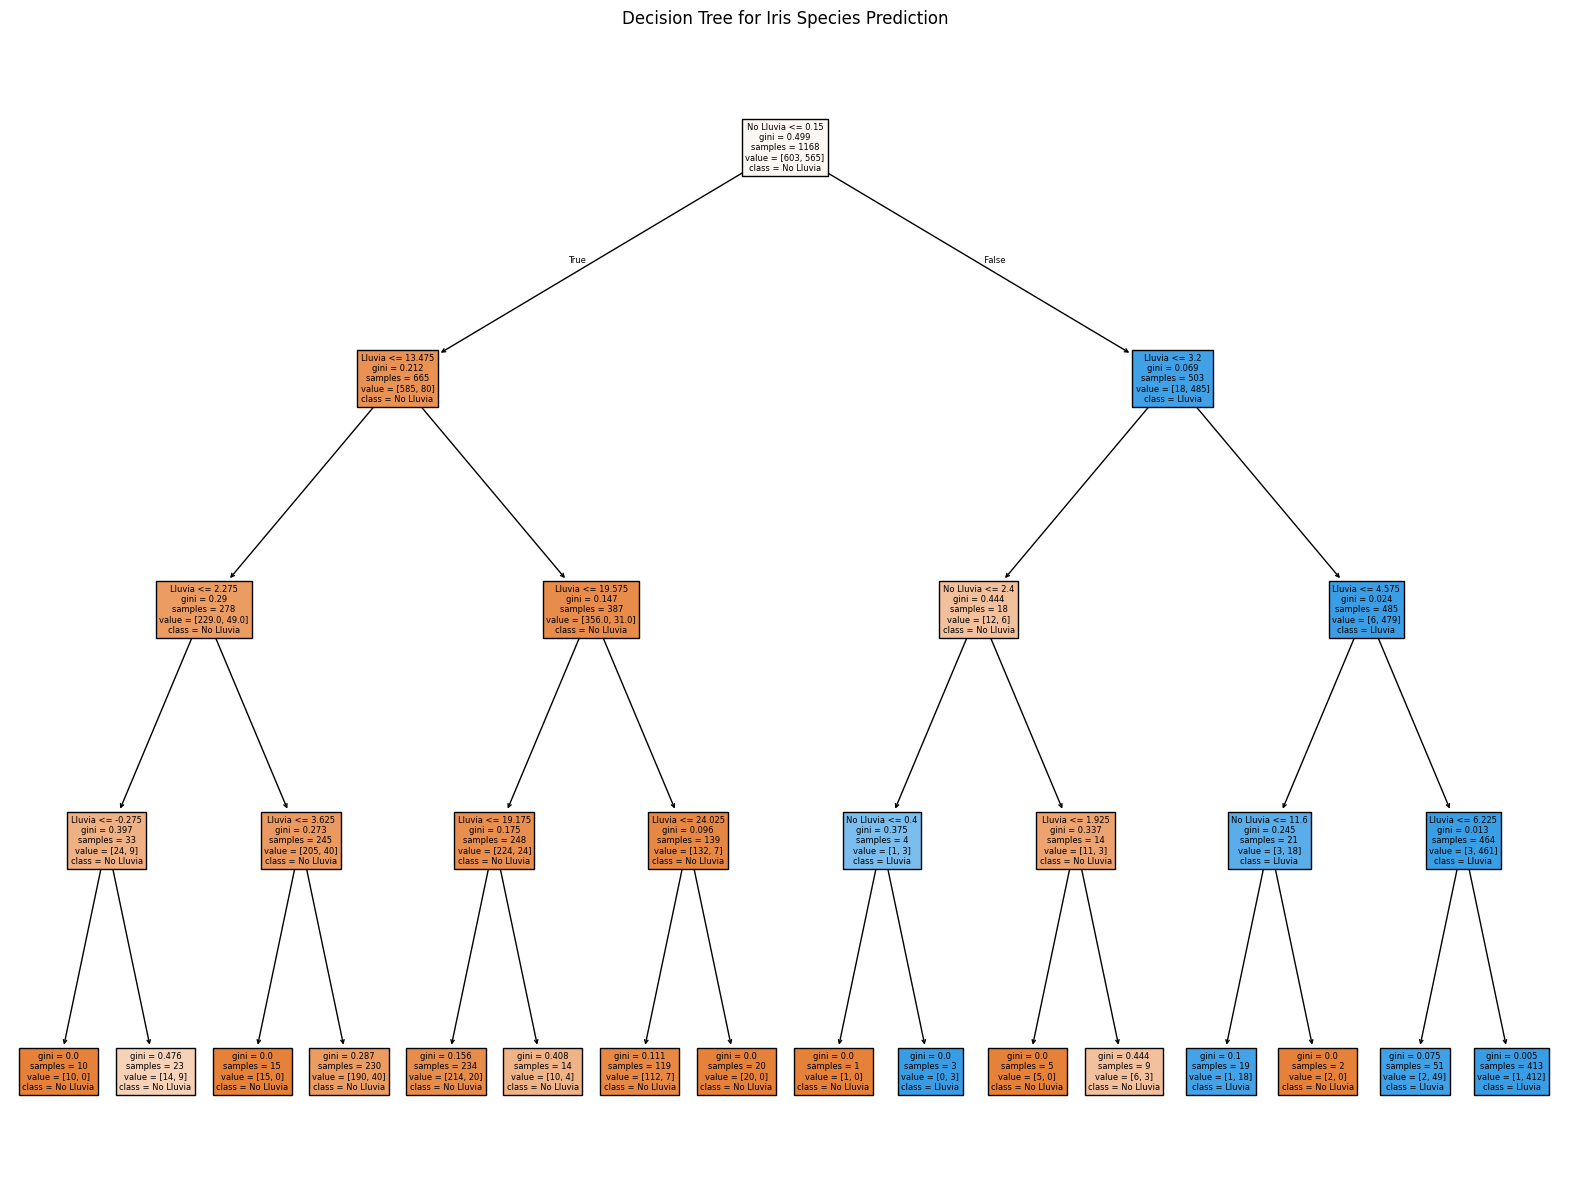

In [ ]:
plt.figure(figsize=(20, 15))  # Increase figure size for better resolution
tree.plot_tree(tree_model, filled=True, feature_names=["No Lluvia", "Lluvia"], class_names=["No Lluvia", "Lluvia"])
plt.title("Decision Tree for Iris Species Prediction")
plt.savefig("decision_tree.png", dpi=300)  # Increase DPI for better resolution
plt.show()

In [ ]:
from sklearn.tree import export_text

In [ ]:
print(export_text(tree_model, feature_names=["precipitation", "temp_avg"]))

|--- precipitation <= 0.15
|   |--- temp_avg <= 13.48
|   |   |--- temp_avg <= 2.27
|   |   |   |--- temp_avg <= -0.28
|   |   |   |   |--- class: 0
|   |   |   |--- temp_avg >  -0.28
|   |   |   |   |--- class: 0
|   |   |--- temp_avg >  2.27
|   |   |   |--- temp_avg <= 3.62
|   |   |   |   |--- class: 0
|   |   |   |--- temp_avg >  3.62
|   |   |   |   |--- class: 0
|   |--- temp_avg >  13.48
|   |   |--- temp_avg <= 19.58
|   |   |   |--- temp_avg <= 19.18
|   |   |   |   |--- class: 0
|   |   |   |--- temp_avg >  19.18
|   |   |   |   |--- class: 0
|   |   |--- temp_avg >  19.58
|   |   |   |--- temp_avg <= 24.02
|   |   |   |   |--- class: 0
|   |   |   |--- temp_avg >  24.02
|   |   |   |   |--- class: 0
|--- precipitation >  0.15
|   |--- temp_avg <= 3.20
|   |   |--- precipitation <= 2.40
|   |   |   |--- precipitation <= 0.40
|   |   |   |   |--- class: 0
|   |   |   |--- precipitation >  0.40
|   |   |   |   |--- class: 1
|   |   |--- precipitation >  2.40
|   |   |   |--- t